# importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./manutencao_preditiva.csv')

In [4]:
df.head()

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df_1 = df[['Temperatura Ar [K]', 'Torque [Nm]']]
df_1.head()

,Temperatura Ar [K],Torque [Nm]
0,298.1,42.8
1,298.2,46.3
2,298.1,49.4
3,298.2,39.5
4,298.2,40.0


In [10]:
df_2 = df[['Temperatura Processo [K]', 'Velocidade Rotacao [rpm]']]
df_2.head()

,Temperatura Processo [K],Velocidade Rotacao [rpm]
0,308.6,1551
1,308.7,1408
2,308.5,1498
3,308.6,1433
4,308.7,1408


In [13]:
df_1_subset = df_1.iloc[:10]
df_2_subset = df_2.iloc[15:25]

df_subset = np.c_[df_1_subset, df_2_subset]
df_subset


array([[ 298.1,   42.8,  309.2, 1542. ],
       [ 298.2,   46.3,  309.2, 1311. ],
       [ 298.1,   49.4,  309.2, 1410. ],
       [ 298.2,   39.5,  309.2, 1306. ],
       [ 298.2,   40. ,  309.3, 1632. ],
       [ 298.1,   41.9,  309.3, 1375. ],
       [ 298.1,   42.4,  309.3, 1450. ],
       [ 298.1,   40.2,  309.3, 1581. ],
       [ 298.3,   28.6,  309.4, 1758. ],
       [ 298.5,   28. ,  309.4, 1561. ]])

In [15]:
print(df_subset)

[[ 298.1   42.8  309.2 1542. ]
 [ 298.2   46.3  309.2 1311. ]
 [ 298.1   49.4  309.2 1410. ]
 [ 298.2   39.5  309.2 1306. ]
 [ 298.2   40.   309.3 1632. ]
 [ 298.1   41.9  309.3 1375. ]
 [ 298.1   42.4  309.3 1450. ]
 [ 298.1   40.2  309.3 1581. ]
 [ 298.3   28.6  309.4 1758. ]
 [ 298.5   28.   309.4 1561. ]]


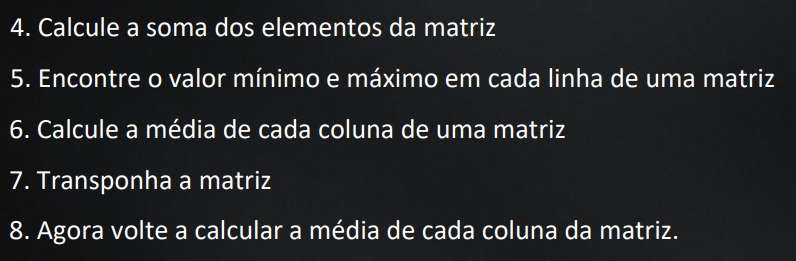

In [35]:
lista = []
def matriz_oper(matriz):
    sum = np.sum(matriz, axis=0)
    max = np.max(matriz, axis=0)
    min = np.min(matriz, axis=0)
    mean = np.mean(matriz, axis=0)
    print(f'{sum},\n {max},\n {min},\n {mean}')
    for linha in matriz:
        lista.append(linha)
    display(lista)


In [36]:
matriz_oper(df_subset)

[ 2981.9   399.1  3092.8 14926. ],
 [ 298.5   49.4  309.4 1758. ],
 [ 298.1   28.   309.2 1306. ],
 [ 298.19   39.91  309.28 1492.6 ]


[array([ 298.1,   42.8,  309.2, 1542. ]),
 array([ 298.2,   46.3,  309.2, 1311. ]),
 array([ 298.1,   49.4,  309.2, 1410. ]),
 array([ 298.2,   39.5,  309.2, 1306. ]),
 array([ 298.2,   40. ,  309.3, 1632. ]),
 array([ 298.1,   41.9,  309.3, 1375. ]),
 array([ 298.1,   42.4,  309.3, 1450. ]),
 array([ 298.1,   40.2,  309.3, 1581. ]),
 array([ 298.3,   28.6,  309.4, 1758. ]),
 array([ 298.5,   28. ,  309.4, 1561. ])]

In [37]:
transposed_matrix = np.transpose(df_subset)
print(transposed_matrix)

[[ 298.1  298.2  298.1  298.2  298.2  298.1  298.1  298.1  298.3  298.5]
 [  42.8   46.3   49.4   39.5   40.    41.9   42.4   40.2   28.6   28. ]
 [ 309.2  309.2  309.2  309.2  309.3  309.3  309.3  309.3  309.4  309.4]
 [1542.  1311.  1410.  1306.  1632.  1375.  1450.  1581.  1758.  1561. ]]


## Revisão para o cp

In [42]:
#busca linear

def busca_linear(lista, valor):
    for i in range(len(lista)):
        if lista[i] == valor:
            return i
    return None

        
lista = [3,6,7,10,4,12,9,5,8]
valor = 14
i = busca_linear(lista, valor)
if i == None:
    print('Valor não encontrado')
else:
    print(f'Valor encontrado na posição {i}')

Valor não encontrado


In [50]:
from random import randint

In [58]:
## busca binária
def busca_binaria(lista, valor):
    low = 0
    high = len(lista) - 1
    while low <= high:
        mid = (low + high) // 2
        chute = lista[mid]
        print(mid,chute, valor,lista[mid])
        if chute == valor:
            return mid
        elif chute > valor:
            high = mid -1 
            print(high,chute, valor,lista)
        else:
            low = mid +1
            print(low,chute, valor,lista)

lista = []
for i in range(10):
    lista.append(randint(1,100))
print(lista)
lista.sort()
lista

[33, 36, 11, 50, 28, 48, 2, 43, 41, 11]


[2, 11, 11, 28, 33, 36, 41, 43, 48, 50]

In [59]:

print(busca_binaria(lista, 43))

4 33 43 33
5 33 43 [2, 11, 11, 28, 33, 36, 41, 43, 48, 50]
7 43 43 43
7


In [60]:
# buscas em grafos
grafo = {
    '5':['3','7'],
    '3':['2','4'],
    '2':[],
    '4':['8'],
    '8':[]
}

In [61]:
print(grafo)

{'5': ['3', '7'], '3': ['2', '4'], '2': [], '4': ['8'], '8': []}


In [69]:
def dfs(visitado, grafico, no):
    if no not in visitado:
        print(no)   # nó atual
        visitado.add(no)    # marca como visitado
        for vizinho in grafico[no]: # para cada vizinho do nó atual
            dfs(visitado, grafico, vizinho) # chama a função recursivamente
    print(visitado)


visitado = set()
dfs(visitado, grafo, '3')


3
2
{'2', '3'}
4
8
{'2', '8', '3', '4'}
{'2', '8', '3', '4'}
{'2', '8', '3', '4'}


In [75]:
# buca em largura
def bfs(grafo, inicio):
    visitados = set()
    fila = []
    fila.append(inicio)
    while fila:
        vertice = fila.pop(0)
        if vertice not in visitados:
            print(vertice)
            visitados.add(vertice)
            fila.extend(grafo[vertice] - visitados)
    print(visitados)

bfs(grafo, '5')

5


TypeError: unsupported operand type(s) for -: 'list' and 'set'